Import Librabry

In [6]:
#I Putu Yoga Tunas Sugitha
#205150600111033
#Data Mining - C
#TP02

#datasource link : https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

#Import python library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [7]:
url = 'https://raw.githubusercontent.com/yoga-sugitha/DataMining/main/exams.csv'
df = pd.read_csv(url)

In [8]:
## Memeriksa apakah ada value null pada
df.info()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [9]:
##setelah di cek, tidak ada data null
##dilanjutkan dengan memeriksa outlier
##sebelum itu untuk mempermudah, akan digunakan dataset untuk column dengan data type
##integer atau numeric saja, selain itu akan di hapus
df2 = df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)

In [10]:
print(df)
print(df2)

     gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          67             67         

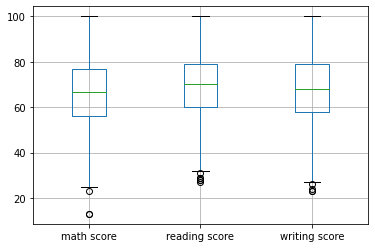

In [11]:
##sekarang ada 2 dataset yaitu dataset yg utuh df dan yg sudah di remove non int columnya yaitu df2
dfplt = df2.boxplot(column = ['math score', 'reading score', 'writing score'])
dfplt.plot()
plt.show()

In [12]:
## dari ketiga dataset, didapatkan ada data outlier,
## selanjutnya kita akan memeriksa, data mana saja yg outlier
dfmath = df2['math score']
dfread = df2['reading score']
dfwrite = df2['writing score']

In [13]:
#Q1 dan Q3
#math score
Mq1,Mq3 = np.percentile(dfmath,[25,75])
print('Math', Mq1, '&', Mq3)
#reading score
Rq1,Rq3 = np.percentile(dfread,[25,75])
print('Reading', Rq1, '&', Rq3)
#Writing
Wq1,Wq3 = np.percentile(dfwrite,[25,75])
print('Writing', Wq1, '&', Wq3)

Math 56.0 & 77.0
Reading 60.0 & 79.0
Writing 58.0 & 79.0


In [14]:
#interquartile
#math
iqrMath = Mq3 - Mq1
mBB = Mq1 - (1.5 * iqrMath)
mBA = Mq3 + (1.5 * iqrMath)
print('Math', '\nBatas bawah :', mBB, '\nBatas atas :', mBA)
#reading
iqrRead = Rq3 - Rq1
rBB = Rq1 - (1.5 * iqrRead)
rBA = Rq3 + (1.5 * iqrRead)
print('Reading', '\nBatas bawah :', rBB, '\nBatas atas :', rBA)
#writing
iqrWrite = Wq3 - Wq1
wBB = Wq1 - (1.5 * iqrWrite)
wBA = Wq3 + (1.5 * iqrWrite)
print('Writing', '\nBatas bawah :', wBB, '\nBatas atas :', wBA)

Math 
Batas bawah : 24.5 
Batas atas : 108.5
Reading 
Batas bawah : 31.5 
Batas atas : 107.5
Writing 
Batas bawah : 26.5 
Batas atas : 110.5


In [15]:
#data outlier
#math
mathO = df2[(dfmath < mBB) | (dfmath > mBA)]
print('Math data outlier : \n', mathO)
#reading
readO = df2[(dfread < rBB) | (dfread > rBA)]
print('Reading data outlier : \n', readO)
#writing
writeO = df2[(dfwrite < wBB) | (dfwrite > wBA)]
print('Writing data outlier : \n', writeO)

Math data outlier : 
      math score  reading score  writing score
18           23             44             44
392          13             29             23
832          13             36             37
Reading data outlier : 
      math score  reading score  writing score
300          43             28             24
392          13             29             23
689          36             27             26
885          37             28             23
899          45             31             27
976          31             29             35
Writing data outlier : 
      math score  reading score  writing score
300          43             28             24
392          13             29             23
689          36             27             26
885          37             28             23


In [16]:
#clean data
#math
mathClean = df2[(dfmath >= mBB) | (dfmath <= mBA)]
print('Math data clean : \n', mathClean)
#reading
readClean = df2[(dfread >= rBB) | (dfread <= rBA)]
print('Reading data clean : \n', readClean)
#writing
writeClean = df2[(dfwrite >= wBB) | (dfwrite <= wBA)]
print('Writing data clean : \n', writeClean)

Math data clean : 
      math score  reading score  writing score
0            67             67             63
1            40             59             55
2            59             60             50
3            77             78             68
4            78             73             68
..          ...            ...            ...
995          73             70             65
996          85             91             92
997          32             35             41
998          73             74             82
999          65             60             62

[1000 rows x 3 columns]
Reading data clean : 
      math score  reading score  writing score
0            67             67             63
1            40             59             55
2            59             60             50
3            77             78             68
4            78             73             68
..          ...            ...            ...
995          73             70             65
996         

In [17]:
###Normalisasi min max
df3 = df2[['math score', 'reading score', 'writing score']]
print(df3)

     math score  reading score  writing score
0            67             67             63
1            40             59             55
2            59             60             50
3            77             78             68
4            78             73             68
..          ...            ...            ...
995          73             70             65
996          85             91             92
997          32             35             41
998          73             74             82
999          65             60             62

[1000 rows x 3 columns]


In [18]:
scaler = MinMaxScaler()
scaler.fit(df3)
dftrans = scaler.transform(df3)
print(dftrans)
##size data terlalu banyak sehingga yang ditampilkan hanya head dan tail saja

[[0.62068966 0.54794521 0.51948052]
 [0.31034483 0.43835616 0.41558442]
 [0.52873563 0.45205479 0.35064935]
 ...
 [0.2183908  0.10958904 0.23376623]
 [0.68965517 0.64383562 0.76623377]
 [0.59770115 0.45205479 0.50649351]]


In [19]:
scalerstd = StandardScaler()
scalerstd.fit(df3)
dftrans2 = scalerstd.transform(df3)
print(dftrans2)

[[ 0.03923309 -0.13591401 -0.30385073]
 [-1.714564   -0.67902695 -0.81689543]
 [-0.48041049 -0.61113783 -1.13754838]
 ...
 [-2.23420758 -2.30836575 -1.71472367]
 [ 0.42896578  0.33930981  0.91463045]
 [-0.0906778  -0.61113783 -0.36798132]]
